In [ ]:
!pip install -U yt-dlp opencv-python-headless torch numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 865.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
url="https://www.youtube.com/watch?v=_L5IldIpDtg"
!yt-dlp -f 160 -o "video_144p.mp4" $url


[youtube] Extracting URL: https://www.youtube.com/watch?v=_L5IldIpDtg
[youtube] _L5IldIpDtg: Downloading webpage
[youtube] _L5IldIpDtg: Downloading tv client config
[youtube] _L5IldIpDtg: Downloading player 9a279502-main
[youtube] _L5IldIpDtg: Downloading tv player API JSON
[youtube] _L5IldIpDtg: Downloading ios player API JSON
[youtube] _L5IldIpDtg: Downloading m3u8 information
[info] _L5IldIpDtg: Downloading 1 format(s): 160
[download] Destination: video_144p.mp4
[download] 100% of   11.02MiB in 00:00:04 at 2.72MiB/s


In [ ]:
!ffmpeg -i video_144p.mp4 -vf "scale=256:144,fps=24" -c:v libx264 -crf 23 video_144p_24fps.mp4 -y


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import cv2, torch, numpy as np

VIDEO_PATH = 'video_144p_24fps.mp4'
FRAMES_PER_CLIP = 240
clips = []

cap = cv2.VideoCapture(VIDEO_PATH)
clip_buf = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    clip_buf.append(gray)

    if len(clip_buf) == FRAMES_PER_CLIP:
        # (p1, p2, p3) == (144, 256, 240)
        tensor = np.stack(clip_buf, axis=2)
        clips.append(tensor.astype(np.uint8))
        clip_buf.clear()

cap.release()

dataset_np = np.stack(clips, axis=0)       # shape → (n, 144, 256, 240)
dataset_torch = torch.from_numpy(dataset_np)  # optional


In [ ]:
torch.save(dataset_torch, 'tensor_dataset.pt')

In [ ]:
import torch
import numpy as np

dataset = torch.load('tensor_dataset.pt', map_location='cpu')

print(f"type      : {type(dataset)}")
print(f"dtype     : {dataset.dtype}")
print(f"shape     : {tuple(dataset.shape)}")
print(f"n clips   : {dataset.shape[0]}")
print(f"frame H×W : {dataset.shape[1]} × {dataset.shape[2]}")
print(f"frames/clip: {dataset.shape[3]}")




type      : <class 'torch.Tensor'>
dtype     : torch.uint8
shape     : (223, 144, 256, 240)
n clips   : 223
frame H×W : 144 × 256
frames/clip: 240
mean pixel value of 1‑й кадр: 57.6


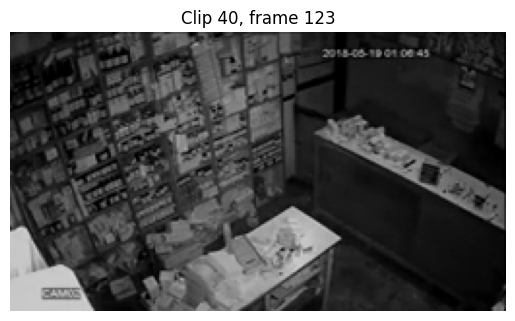

In [ ]:
import torch
import matplotlib.pyplot as plt

# если датасет ещё не загружен:
dataset = torch.load('tensor_dataset.pt', map_location='cpu')  # shape (n, 144, 256, 240)

# выберите интересующий кадр
clip_idx  = 40    # первый фрагмент
frame_idx = 123   # 124‑й кадр (счёт с нуля)

# извлекаем кадр и показываем
frame = dataset[clip_idx, :, :, frame_idx].numpy()   # (144, 256), dtype uint8

plt.imshow(frame, cmap='gray', vmin=0, vmax=255)
plt.title(f'Clip {clip_idx}, frame {frame_idx}')
plt.axis('off')
plt.show()


In [ ]:

!zip -9 tensor_dataset.zip tensor_dataset.pt


  adding: tensor_dataset.pt (deflated 86%)


In [ ]:

from google.colab import files
files.download('tensor_dataset.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>